# Token Burning Events
Analyzing the price impact on select cryptocurrencies before and after token burning events
Currencies to analyze:
- ETH (Ethereum)
- XLM (Stellar Luna)

In [2]:
#!pip install yfinance

In [33]:
#! pip install plotly==5.8.0

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import plotly.express as px

In [35]:
# Obtaining price data for the four above cryptocurrencies, around the token burning events in question, with 
# their chosen pairings being the one with the highest volume as of today.
# ETH-USD -- August, 2021; XLM-USD -- November, 2019

eth = ['ETH-USD']
xlm = ['XLM-USD']

In [36]:
eth_data = yf.download(eth, start='2021-08-01',
                end='2021-08-31')

xlm_data = yf.download(xlm, start='2019-11-01',
                end='2019-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
eth_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-01,2530.462891,2695.429443,2520.931885,2561.852051,2561.852051,22697987055
2021-08-02,2557.774658,2665.730957,2511.375244,2610.153320,2610.153320,22162754104
2021-08-03,2609.413086,2630.314209,2449.353516,2502.349609,2502.349609,22696753413
2021-08-04,2508.544922,2764.443604,2463.469482,2724.619873,2724.619873,25038698173
2021-08-05,2725.669678,2840.430664,2540.684082,2827.328857,2827.328857,31057928075
2021-08-06,2827.503418,2944.903320,2727.792725,2890.941650,2890.941650,26528577879
2021-08-07,2891.707520,3170.229736,2868.535645,3157.238770,3157.238770,33081467129
2021-08-08,3161.232666,3184.604004,2951.747314,3013.732666,3013.732666,28433638008
2021-08-09,3012.885742,3185.701172,2900.926025,3167.856201,3167.856201,31983260936


In [38]:
xlm_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,0.065189,0.071221,0.064798,0.069231,0.069231,412594573
2019-11-02,0.069217,0.071289,0.069216,0.071264,0.071264,287438284
2019-11-03,0.071283,0.071871,0.068081,0.069091,0.069091,310422869
2019-11-04,0.069165,0.076390,0.067937,0.076390,0.076390,347400349
2019-11-05,0.076817,0.085214,0.076808,0.082164,0.082164,762923850
2019-11-06,0.082237,0.083190,0.077835,0.078435,0.078435,352059614
2019-11-07,0.078343,0.078494,0.074204,0.075014,0.075014,332631177
2019-11-08,0.075006,0.076303,0.070550,0.071888,0.071888,271749982
2019-11-09,0.071845,0.073439,0.071620,0.072812,0.072812,187035481


### EIP-1559 Passed August 5th: ETH Adjusted Close Price
--
What we can see here is a price jump from below 2600 USD per ETH to north of 2800 ETH by the end of August 5th

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

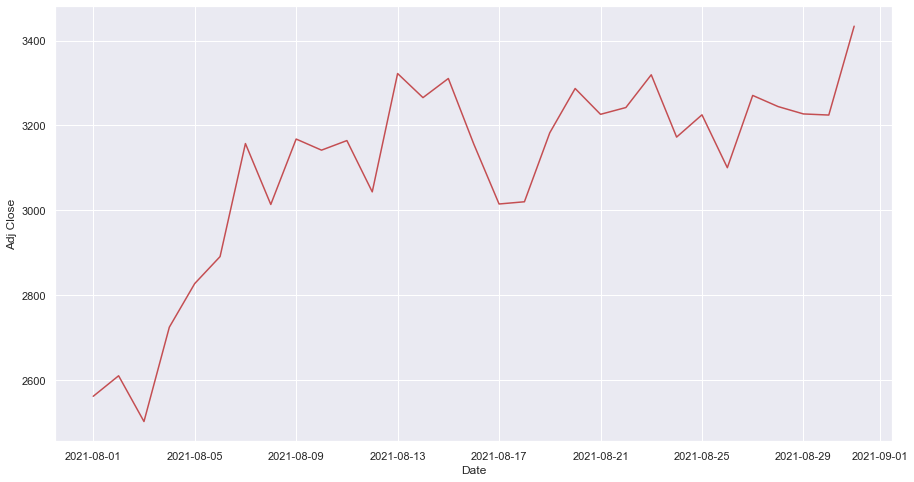

In [39]:
# Plotting the adjusted closing price for ETH
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Adj Close', color = 'r', data = eth_data)

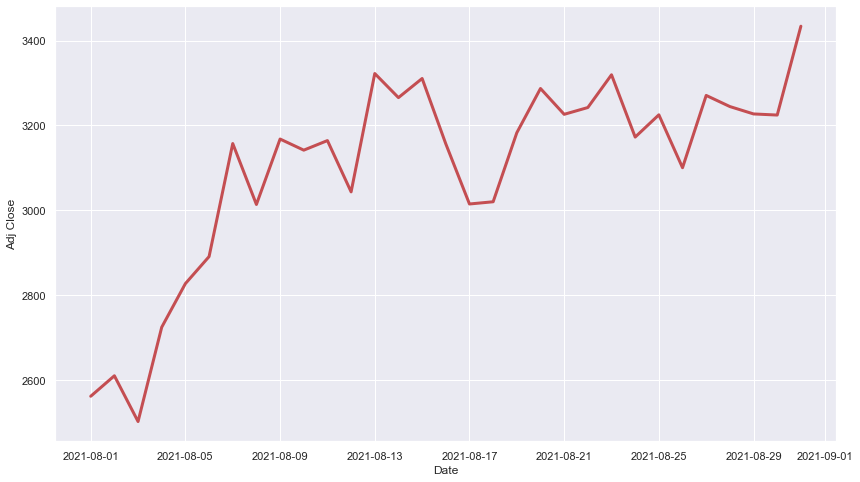

In [40]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=eth_data, x ='Date', y = 'Adj Close', color = 'r', palette='viridis', legend='full', lw=3)

In [43]:
# Practice here with Plotly

### Adjusted Closing Price of XLM After November 5, 2019 Token Burning Event
--


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

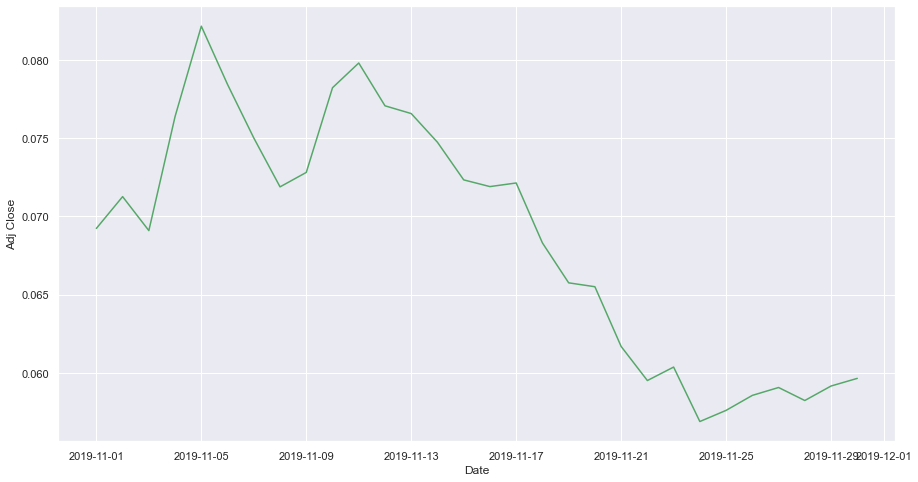

In [41]:
# Plotting the adjusted closing price for ETH
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Adj Close', color = 'g', data = xlm_data)

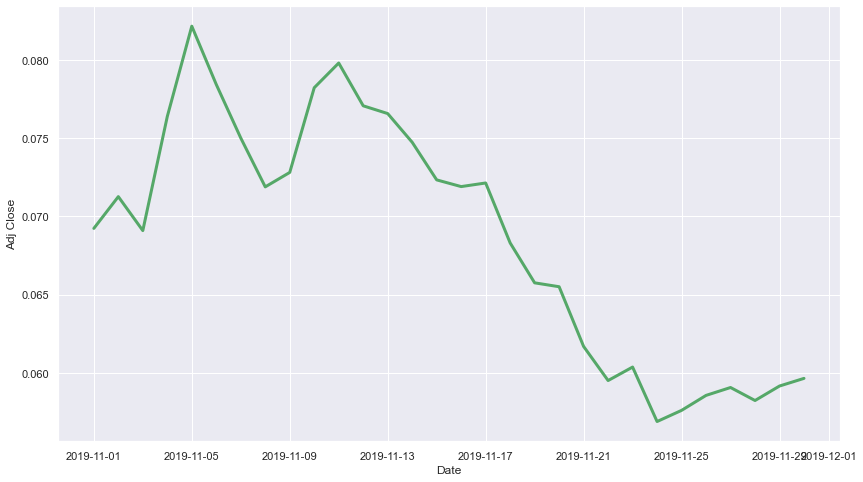

In [42]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=xlm_data, x ='Date', y = 'Adj Close', color = 'g', palette='viridis', legend='full', lw=3)

In [44]:
# Practice here with Plotly

In [ ]:
# Creating a 'return' feature